In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

## Data Loading and Cleaning

In [236]:
df=pd.read_csv("C:\\Users\\astra\\Documents\\Python_notebooks\\Fannie Mae\\vintage_analysis\\df_final.csv",low_memory=False)

C:\Users\astra\AppData\Local\Temp\ipykernel_23936\2386887190.py:1: DtypeWarning: Columns (0,2,3,4,6,7,8,9,10,11,12,13,14,18,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("C:\\Users\\astra\\Documents\\Python_notebooks\\Fannie Mae\\vintage_analysis\\df_final.csv")


In [237]:
df.head()

,LOAN_ID,DLQ_STATUS_x,ACT_PERIOD_x,CURRENT_UPB_x,ACT_PERIOD_y,CHANNEL,ORIG_RATE,ORIG_UPB,CURRENT_UPB_y,ORIG_TERM,ORIG_DATE,MATR_DT,OLTV,NUM_BO,DTI,CSCORE_B,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE,MI_PCT,DLQ_STATUS_y,MOD_FLAG,ACT_PERIOD_YEAR
0,104657170903,1,22004,27372.19,12004,R,7.75,29000.0,27372.19,360,121999,12030.0,94,2,55.0,641.0,N,P,CO,1,S,OK,30.0,C,N,2004.0
1,104657170903,C,12004,27372.19,12004,R,7.75,29000.0,27372.19,360,121999,12030.0,94,2,55.0,641.0,N,P,CO,1,S,OK,30.0,C,N,2004.0
2,105077791942,C,12004,17827.18,12004,R,7.625,27000.0,17827.18,180,12000,22015.0,78,2,22.0,752.0,N,P,SF,1,P,GA,NaN,C,N,2004.0
3,105367116671,1,92012,30449.32,12004,R,8.375,39000.0,37266.56,360,111999,122029.0,63,3,NaN,795.0,N,R,CO,1,P,FL,NaN,C,N,2004.0
4,105367116671,2,82014,28608.97,12004,R,8.375,39000.0,37266.56,360,111999,122029.0,63,3,NaN,795.0,N,R,CO,1,P,FL,NaN,C,N,2004.0


In [238]:
df=df.drop(['DLQ_STATUS_y','ACT_PERIOD_y','CURRENT_UPB_y','MATR_DT','DLQ_STATUS_y','ACT_PERIOD_YEAR'],axis=1)
df=df.rename(columns={'DLQ_STATUS_x':'DLQ_STATUS','ACT_PERIOD_x':'ACT_PERIOD','CURRENT_UPB_x':'UPB_AT_DLQ_STATUS'})

In [239]:
df['ORIG_DATE'].unique()

array(['121999', '12000', '111999', '22000', '101999', '32000', '91999',
       'ORIG_DATE', '52000', '42000', '72000', '62000', '82000', '92000',
       '112000', '102000', '122000', '12001', '22001', '32001', '42001',
       '52001', '62001', '82001', '72001', '92001', '122001', '112001',
       '102001', '32002', '22002', '12002', '42002', '52002', '62002',
       '21999', '61999', '31999', '81999', '41999', '11999', '51999',
       '71999', '92002', '82002', '72002', '102003', '122003', '22004',
       '12004', '112003', '92003', '82003', '72003', '52003', '42003',
       '32004', '62003', '112002', '122002', '32003', '52004', '42004',
       '62004', 32004, 22004, 42004, 52004, 12004, 122003, 62004, 112001,
       112003, 82004, 72004, 92004, 102003, 62003, 32003, 92003, 72003,
       82003, 42003, 102004, 112004, 122004, 52003, 22005, 12005, 32005,
       52005, 42005, 62005, 82005, 72005, 92005, 102005, 112005, 122005,
       12006, 22006, 32006, 42006, 52006, 62006, 82006, 7200

In [240]:
df[df['ORIG_DATE']=='ORIG_DATE']

,LOAN_ID,DLQ_STATUS,ACT_PERIOD,UPB_AT_DLQ_STATUS,CHANNEL,ORIG_RATE,ORIG_UPB,ORIG_TERM,ORIG_DATE,OLTV,NUM_BO,DTI,CSCORE_B,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE,MI_PCT,MOD_FLAG
870,LOAN_ID,DLQ_STATUS_x,ACT_PERIOD_x,CURRENT_UPB_x,CHANNEL,ORIG_RATE,ORIG_UPB,ORIG_TERM,ORIG_DATE,NUM_BO,DTI,CSCORE_B,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE,MI_PCT,DLQ_STATUS_y,ACT_PERIOD_YEAR


In [241]:
df=df[df['ORIG_DATE']!='ORIG_DATE']

In [242]:
df['ORIG_DATE'].unique()

array(['121999', '12000', '111999', '22000', '101999', '32000', '91999',
       '52000', '42000', '72000', '62000', '82000', '92000', '112000',
       '102000', '122000', '12001', '22001', '32001', '42001', '52001',
       '62001', '82001', '72001', '92001', '122001', '112001', '102001',
       '32002', '22002', '12002', '42002', '52002', '62002', '21999',
       '61999', '31999', '81999', '41999', '11999', '51999', '71999',
       '92002', '82002', '72002', '102003', '122003', '22004', '12004',
       '112003', '92003', '82003', '72003', '52003', '42003', '32004',
       '62003', '112002', '122002', '32003', '52004', '42004', '62004',
       32004, 22004, 42004, 52004, 12004, 122003, 62004, 112001, 112003,
       82004, 72004, 92004, 102003, 62003, 32003, 92003, 72003, 82003,
       42003, 102004, 112004, 122004, 52003, 22005, 12005, 32005, 52005,
       42005, 62005, 82005, 72005, 92005, 102005, 112005, 122005, 12006,
       22006, 32006, 42006, 52006, 62006, 82006, 72006, 92006, 102

In [243]:
#df=df[df['DLQ_STATUS']!='C']

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1793767 entries, 0 to 1793767
Data columns (total 21 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   LOAN_ID            object
 1   DLQ_STATUS         object
 2   ACT_PERIOD         object
 3   UPB_AT_DLQ_STATUS  object
 4   CHANNEL            object
 5   ORIG_RATE          object
 6   ORIG_UPB           object
 7   ORIG_TERM          object
 8   ORIG_DATE          object
 9   OLTV               object
 10  NUM_BO             object
 11  DTI                object
 12  CSCORE_B           object
 13  FIRST_FLAG         object
 14  PURPOSE            object
 15  PROP               object
 16  NO_UNITS           object
 17  OCC_STAT           object
 18  STATE              object
 19  MI_PCT             object
 20  MOD_FLAG           object
dtypes: object(21)
memory usage: 301.1+ MB


In [245]:
df['ACT_PERIOD_YEAR']=df['ACT_PERIOD'].astype(str).str[-4:]

In [246]:
df.head()

,LOAN_ID,DLQ_STATUS,ACT_PERIOD,UPB_AT_DLQ_STATUS,CHANNEL,ORIG_RATE,ORIG_UPB,ORIG_TERM,ORIG_DATE,OLTV,NUM_BO,DTI,CSCORE_B,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE,MI_PCT,MOD_FLAG,ACT_PERIOD_YEAR
0,104657170903,1,22004,27372.19,R,7.75,29000.0,360,121999,94,2,55.0,641.0,N,P,CO,1,S,OK,30.0,N,2004
1,104657170903,C,12004,27372.19,R,7.75,29000.0,360,121999,94,2,55.0,641.0,N,P,CO,1,S,OK,30.0,N,2004
2,105077791942,C,12004,17827.18,R,7.625,27000.0,180,12000,78,2,22.0,752.0,N,P,SF,1,P,GA,NaN,N,2004
3,105367116671,1,92012,30449.32,R,8.375,39000.0,360,111999,63,3,NaN,795.0,N,R,CO,1,P,FL,NaN,N,2012
4,105367116671,2,82014,28608.97,R,8.375,39000.0,360,111999,63,3,NaN,795.0,N,R,CO,1,P,FL,NaN,N,2014


In [247]:
df=df.sort_values(['LOAN_ID','ACT_PERIOD_YEAR','ACT_PERIOD'],ascending=True)

In [248]:
df.head()

,LOAN_ID,DLQ_STATUS,ACT_PERIOD,UPB_AT_DLQ_STATUS,CHANNEL,ORIG_RATE,ORIG_UPB,ORIG_TERM,ORIG_DATE,OLTV,NUM_BO,DTI,CSCORE_B,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE,MI_PCT,MOD_FLAG,ACT_PERIOD_YEAR
1673439,100000749271,C,122010,0.0,R,5.0,100000.0,360,112010,1.0,40.0,726.0,N,C,SF,1,I,NY,NaN,C,2010,2010
1300060,100002790079,C,102009,0.0,C,5.125,502000.0,360,72009,2.0,6.0,732.0,N,R,SF,1,P,CA,NaN,C,2009,2009
732289,100003230356,C,92008,0.0,B,6.625,338000.0,360,82008,2,46.0,647.0,N,P,PU,1,P,FL,25.0,C,2008,2008
1673440,100004094131,C,102010,0.0,C,3.75,159000.0,180,92010,2.0,24.0,708.0,N,R,SF,1,P,KY,NaN,C,2010,2010
1568552,100004658148,C,92010,0.0,B,5.0,251000.0,360,82010,1.0,37.0,782.0,N,C,SF,1,P,CA,NaN,C,2010,2010


In [249]:
#b_df=df[df['DLQ_STATUS'].isin]
df['BUCKET']='B'+df['DLQ_STATUS'].astype(str)

In [250]:
df.head()

,LOAN_ID,DLQ_STATUS,ACT_PERIOD,UPB_AT_DLQ_STATUS,CHANNEL,ORIG_RATE,ORIG_UPB,ORIG_TERM,ORIG_DATE,OLTV,NUM_BO,DTI,CSCORE_B,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE,MI_PCT,MOD_FLAG,ACT_PERIOD_YEAR,BUCKET
1673439,100000749271,C,122010,0.0,R,5.0,100000.0,360,112010,1.0,40.0,726.0,N,C,SF,1,I,NY,NaN,C,2010,2010,BC
1300060,100002790079,C,102009,0.0,C,5.125,502000.0,360,72009,2.0,6.0,732.0,N,R,SF,1,P,CA,NaN,C,2009,2009,BC
732289,100003230356,C,92008,0.0,B,6.625,338000.0,360,82008,2,46.0,647.0,N,P,PU,1,P,FL,25.0,C,2008,2008,BC
1673440,100004094131,C,102010,0.0,C,3.75,159000.0,180,92010,2.0,24.0,708.0,N,R,SF,1,P,KY,NaN,C,2010,2010,BC
1568552,100004658148,C,92010,0.0,B,5.0,251000.0,360,82010,1.0,37.0,782.0,N,C,SF,1,P,CA,NaN,C,2010,2010,BC


In [251]:
#pivot=first_bucket.pivot(index='LOAN_ID',columns='BUCKET')
pivot_amt=df.pivot_table(index='LOAN_ID',columns='BUCKET',values='UPB_AT_DLQ_STATUS',aggfunc='first')
pivot_dt=df.pivot_table(index='LOAN_ID',columns='BUCKET',values='ACT_PERIOD',aggfunc='first')

pivot_amt.columns=[f'{x}{b}_amt' for x, b in pivot_amt.columns]
pivot_dt.columns=[f'{x}{b}_dt' for x, b in pivot_dt.columns]

pivot_amt=pivot_amt.reset_index()
pivot_dt=pivot_dt.reset_index()


In [252]:
pivot_amt.head()

,LOAN_ID,B1_amt,B2_amt,B3_amt,B4_amt,BC_amt,BX_amt
0,100000749271,NaN,NaN,NaN,NaN,0.0,NaN
1,100002790079,NaN,NaN,NaN,NaN,0.0,NaN
2,100003230356,NaN,NaN,NaN,NaN,0.0,NaN
3,100004094131,NaN,NaN,NaN,NaN,0.0,NaN
4,100004658148,NaN,NaN,NaN,NaN,0.0,NaN


In [253]:
pivot_dt.head()

,LOAN_ID,B1_dt,B2_dt,B3_dt,B4_dt,BC_dt,BX_dt
0,100000749271,NaN,NaN,NaN,NaN,122010,NaN
1,100002790079,NaN,NaN,NaN,NaN,102009,NaN
2,100003230356,NaN,NaN,NaN,NaN,92008,NaN
3,100004094131,NaN,NaN,NaN,NaN,102010,NaN
4,100004658148,NaN,NaN,NaN,NaN,92010,NaN


In [254]:
df_pivot=pd.merge(pivot_amt,pivot_dt,on='LOAN_ID',how='left')

In [255]:
df_temp=pd.merge(df,df_pivot,on='LOAN_ID',how='left')

In [256]:
df_temp.head()

,LOAN_ID,DLQ_STATUS,ACT_PERIOD,UPB_AT_DLQ_STATUS,CHANNEL,ORIG_RATE,ORIG_UPB,ORIG_TERM,ORIG_DATE,OLTV,NUM_BO,DTI,CSCORE_B,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE,MI_PCT,MOD_FLAG,ACT_PERIOD_YEAR,BUCKET,B1_amt,B2_amt,B3_amt,B4_amt,BC_amt,BX_amt,B1_dt,B2_dt,B3_dt,B4_dt,BC_dt,BX_dt
0,100000749271,C,122010,0.0,R,5.0,100000.0,360,112010,1.0,40.0,726.0,N,C,SF,1,I,NY,NaN,C,2010,2010,BC,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,122010,NaN
1,100002790079,C,102009,0.0,C,5.125,502000.0,360,72009,2.0,6.0,732.0,N,R,SF,1,P,CA,NaN,C,2009,2009,BC,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,102009,NaN
2,100003230356,C,92008,0.0,B,6.625,338000.0,360,82008,2,46.0,647.0,N,P,PU,1,P,FL,25.0,C,2008,2008,BC,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,92008,NaN
3,100004094131,C,102010,0.0,C,3.75,159000.0,180,92010,2.0,24.0,708.0,N,R,SF,1,P,KY,NaN,C,2010,2010,BC,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,102010,NaN
4,100004658148,C,92010,0.0,B,5.0,251000.0,360,82010,1.0,37.0,782.0,N,C,SF,1,P,CA,NaN,C,2010,2010,BC,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,92010,NaN


In [278]:
df_clean=df_temp.drop_duplicates(subset=['LOAN_ID'])
df_clean=df_clean.drop(['DLQ_STATUS','ACT_PERIOD','UPB_AT_DLQ_STATUS','ACT_PERIOD_YEAR','BUCKET','BX_amt','BX_dt','BC_amt','BC_dt'],axis=1)

In [282]:
df_clean.head()

,LOAN_ID,CHANNEL,ORIG_RATE,ORIG_UPB,ORIG_TERM,ORIG_DATE,OLTV,NUM_BO,DTI,CSCORE_B,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE,MI_PCT,MOD_FLAG,B1_amt,B2_amt,B3_amt,B4_amt,B1_dt,B2_dt,B3_dt,B4_dt
0,100000749271,R,5.0,100000.0,360,112010,1.0,40.0,726.0,N,C,SF,1,I,NY,NaN,C,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100002790079,C,5.125,502000.0,360,72009,2.0,6.0,732.0,N,R,SF,1,P,CA,NaN,C,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100003230356,B,6.625,338000.0,360,82008,2,46.0,647.0,N,P,PU,1,P,FL,25.0,C,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100004094131,C,3.75,159000.0,180,92010,2.0,24.0,708.0,N,R,SF,1,P,KY,NaN,C,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100004658148,B,5.0,251000.0,360,82010,1.0,37.0,782.0,N,C,SF,1,P,CA,NaN,C,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data manipulation for vintage table

In [285]:
df_clean['B1_DATE']=pd.to_datetime(df_clean['B1_dt'].astype(str),format='%m%Y',errors='coerce')
df_clean['B2_DATE']=pd.to_datetime(df_clean['B2_dt'].astype(str),format='%m%Y',errors='coerce')
df_clean['B3_DATE']=pd.to_datetime(df_clean['B3_dt'].astype(str),format='%m%Y',errors='coerce')
df_clean['B4_DATE']=pd.to_datetime(df_clean['B4_dt'].astype(str),format='%m%Y',errors='coerce')
df_clean['ORIG_DATE_F']=pd.to_datetime(df_clean['ORIG_DATE'].astype(str),format='%m%Y',errors='coerce')

In [287]:
df_clean['MONTHS_FROM_ORIG_TO_B1']=(
    (df_clean['B1_DATE'].dt.year-df_clean['ORIG_DATE_F'].dt.year)*12
    +(df_clean['B1_DATE'].dt.month-df_clean['ORIG_DATE_F'].dt.month)
)

df_clean['MONTHS_FROM_ORIG_TO_B2']=(
    (df_clean['B2_DATE'].dt.year-df_clean['ORIG_DATE_F'].dt.year)*12
    +(df_clean['B2_DATE'].dt.month-df_clean['ORIG_DATE_F'].dt.month)
)

df_clean['MONTHS_FROM_ORIG_TO_B3']=(
    (df_clean['B3_DATE'].dt.year-df_clean['ORIG_DATE_F'].dt.year)*12
    +(df_clean['B3_DATE'].dt.month-df_clean['ORIG_DATE_F'].dt.month)
)

df_clean['MONTHS_FROM_ORIG_TO_B4']=(
    (df_clean['B4_DATE'].dt.year-df_clean['ORIG_DATE_F'].dt.year)*12
    +(df_clean['B4_DATE'].dt.month-df_clean['ORIG_DATE_F'].dt.month)
)

In [289]:
df_clean.head()

,LOAN_ID,CHANNEL,ORIG_RATE,ORIG_UPB,ORIG_TERM,ORIG_DATE,OLTV,NUM_BO,DTI,CSCORE_B,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE,MI_PCT,MOD_FLAG,B1_amt,B2_amt,B3_amt,B4_amt,B1_dt,B2_dt,B3_dt,B4_dt,B1_DATE,B2_DATE,B3_DATE,B4_DATE,ORIG_DATE_F,MONTHS_FROM_ORIG_TO_B1,MONTHS_FROM_ORIG_TO_B2,MONTHS_FROM_ORIG_TO_B3,MONTHS_FROM_ORIG_TO_B4
0,100000749271,R,5.0,100000.0,360,112010,1.0,40.0,726.0,N,C,SF,1,I,NY,NaN,C,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,2010-11-01,NaN,NaN,NaN,NaN
1,100002790079,C,5.125,502000.0,360,72009,2.0,6.0,732.0,N,R,SF,1,P,CA,NaN,C,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,2009-07-01,NaN,NaN,NaN,NaN
2,100003230356,B,6.625,338000.0,360,82008,2,46.0,647.0,N,P,PU,1,P,FL,25.0,C,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,2008-08-01,NaN,NaN,NaN,NaN
3,100004094131,C,3.75,159000.0,180,92010,2.0,24.0,708.0,N,R,SF,1,P,KY,NaN,C,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,2010-09-01,NaN,NaN,NaN,NaN
4,100004658148,B,5.0,251000.0,360,82010,1.0,37.0,782.0,N,C,SF,1,P,CA,NaN,C,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,2010-08-01,NaN,NaN,NaN,NaN


In [309]:
df_clean['ORIG_UPB'] = pd.to_numeric(df_clean['ORIG_UPB'], errors='coerce')
df_clean['ORIG_UPB']=df_clean['ORIG_UPB'].astype(int)
df_clean['B3_amt'] = pd.to_numeric(df_clean['B3_amt'], errors='coerce')

In [349]:
#vintage_df = df_clean[['LOAN_ID', 'ORIG_DATE_F', 'ORIG_UPB','B3_amt','MONTHS_FROM_ORIG_TO_B3']].copy()
df_clean['ORIG_QTRYR']=df_clean['ORIG_DATE_F'].dt.to_period('Q')
vintage_df = df_clean[['LOAN_ID', 'ORIG_QTRYR', 'ORIG_UPB','B3_amt','MONTHS_FROM_ORIG_TO_B3']].copy()
vintage_df['DEFAULTED'] = vintage_df['MONTHS_FROM_ORIG_TO_B3'].notna().astype(int)

In [381]:
total_loans=vintage_df.groupby('ORIG_QTRYR')['ORIG_UPB'].sum()
total_loans = total_loans[total_loans.index >= '2004-01-01']

In [382]:
default_loans=vintage_df[vintage_df['DEFAULTED']==1].groupby(['ORIG_QTRYR','MONTHS_FROM_ORIG_TO_B3'])['B3_amt'].sum().unstack().fillna(0)
default_loans = default_loans[default_loans.index >= '2004-01-01']

In [383]:
default_loans

MONTHS_FROM_ORIG_TO_B3,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0,130.0,131.0,132.0,133.0,134.0,135.0,136.0,137.0,138.0,139.0,140.0,141.0,142.0,143.0,144.0,145.0,146.0,147.0,148.0,149.0,150.0,151.0,152.0,153.0,154.0,155.0,156.0,157.0,158.0,159.0,160.0,161.0,162.0,163.0,164.0,165.0,166.0,167.0,168.0,169.0,170.0,171.0,172.0,173.0,174.0,175.0,176.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0,184.0,185.0,186.0,187.0,188.0,189.0,190.0,191.0,192.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0,200.0,201.0,202.0,203.0,204.0,205.0,206.0,207.0,208.0,209.0,210.0,211.0,212.0,213.0,214.0,215.0,217.0,218.0,220.0,221.0,222.0,223.0,225.0,226.0,227.0,229.0,230.0,231.0,232.0,234.0,235.0,239.0,245.0,248.0
ORIG_QTRYR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004Q1,0.0,105815.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,201759.93,0.00,0.00,253893.44,403921.51,0.00,0.00,0.00,128527.79,321810.16,140631.71,0.00,0.00,0.00,0.00,0.00,0.00,114604.05,85487.74,579169.33,174242.49,0.00,0.00,137563.66,0.00,0.00,79966.55,128676.39,0.00,0.00,139289.36,0.00,247093.99,0.00,0.00,283846.22,0.00,153101.76,0.00,118834.26,62834.64,283587.32,385287.31,0.00,0.00,241675.02,678533.48,382036.74,204809.06,1168563.14,427506.91,0.00,606445.28,602361.86,534505.40,199651.81,0.00,1351646.71,261643.65,668581.43,416425.45,609728.03,290324.21,0.00,387296.15,241457.34,425760.16,695074.02,70578.73,55870.36,296413.93,160689.02,0.00,232230.13,103211.56,454813.54,97244.88,559075.77,187703.30,631952.25,177750.12,228110.94,255384.40,283257.59,0.00,0.00,0.00,0.00,0.00,0.00,143140.60,0.00,202143.33,0.00,285422.30,0.00,0.00,0.00,0.00,0.00,155325.15,0.00,0.00,0.00,124212.60,0.00,183236.62,63310.70,0.00,0.00,172562.82,0.00,0.00,0.00,0.00,0.00,0.00,0.00,31135.04,71451.04,160463.82,0.00,82536.71,116394.20,0.00,90705.30,157899.06,104462.78,0.00,0.00,0.00,210123.58,6962.72,0.00,0.00,0.00,0.00,0.00,0.00,18764.69,166301.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,99068.03,0.00,56174.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,48158.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,41568.70,0.00,0.00,0.00,0.00,0.00,157247.83,75477.01,0.00,0.00,202797.69,0.00,0.00,205105.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,53450.84,0.00,0.0,0.0
2004Q2,0.0,0.00,111031.06,0.00,0.00,196453.75,0.00,0.00,190023.36,248741.15,0.00,0.00,0.00,178092.66,0.00,0.00,79275.15,0.00,83689.28,111467.31,0.00,80308.63,110714.57,0.00,175211.12,207225.11,218984.62,0.00,275095.25,0.00,0.00,77395.54,35153.74,199250.44,134883.02,293055.89,332080.90,0.00,732245.66,531997.13,397717.69,0.00,415279.48,431903.24,137158.14,208166.32,146113.82,288086.38,183966.88,670110.22,0.00,832084.70,1100428.00,1519696.65,1559681.96,360856.93,523736.46,677781.82,180995.27,1117884.17,790671.53,470781.29,374464.32,673775.18,993248.85,294856.19,805386.92,399980.73,110632.49,304399.60,887915.49,420636.88,507951.31,252681.81,239432.71,333455.83,461367.38,443329.94,492029.92,517026.74,769631.83,862490.16,854910.19,605161.03,296457.41,865458.25,776772.09,614009.91,395882.76,727793.10,175012.27,808824.34,219128.39,0.00,463122.76,104144.99,65065.87,286833.08,162471.82,447733.02,472248.49,567847

In [384]:
upb_vintage_pct = default_loans.div(total_loans, axis=0) * 100

In [385]:
upb_vintage_pct

MONTHS_FROM_ORIG_TO_B3,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0,130.0,131.0,132.0,133.0,134.0,135.0,136.0,137.0,138.0,139.0,140.0,141.0,142.0,143.0,144.0,145.0,146.0,147.0,148.0,149.0,150.0,151.0,152.0,153.0,154.0,155.0,156.0,157.0,158.0,159.0,160.0,161.0,162.0,163.0,164.0,165.0,166.0,167.0,168.0,169.0,170.0,171.0,172.0,173.0,174.0,175.0,176.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0,184.0,185.0,186.0,187.0,188.0,189.0,190.0,191.0,192.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0,200.0,201.0,202.0,203.0,204.0,205.0,206.0,207.0,208.0,209.0,210.0,211.0,212.0,213.0,214.0,215.0,217.0,218.0,220.0,221.0,222.0,223.0,225.0,226.0,227.0,229.0,230.0,231.0,232.0,234.0,235.0,239.0,245.0,248.0
ORIG_QTRYR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004Q1,0.000000,0.005628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010731,0.000000,0.000000,0.013504,0.021484,0.000000,0.000000,0.000000,0.006836,0.017116,0.007480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006096,0.004547,0.030805,0.009268,0.000000,0.000000,0.007317,0.000000,0.000000,0.004253,0.006844,0.000000,0.000000,0.007409,0.000000,0.013142,0.000000,0.000000,0.015097,0.000000,0.008143,0.000000,0.006321,0.003342,0.015083,0.020493,0.000000,0.000000,0.012854,0.036090,0.020320,0.010893,0.062154,0.022738,0.000000,0.032256,0.032038,0.028429,0.010619,0.000000,0.071891,0.013916,0.035560,0.022149,0.032430,0.015442,0.000000,0.020600,0.012843,0.022645,0.036970,0.003754,0.002972,0.015766,0.008547,0.000000,0.012352,0.005490,0.024191,0.005172,0.029736,0.009984,0.033612,0.009454,0.012133,0.013583,0.015066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007613,0.000000,0.010752,0.000000,0.015181,0.000000,0.000000,0.000000,0.000000,0.000000,0.008261,0.000000,0.000000,0.000000,0.006607,0.000000,0.009746,0.003367,0.000000,0.000000,0.009178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001656,0.003800,0.008535,0.000000,0.004390,0.006191,0.000000,0.004824,0.008398,0.005556,0.000000,0.000000,0.000000,0.011176,0.000370,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000998,0.008845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005269,0.000000,0.002988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002561,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002211,0.000000,0.000000,0.000000,0.000000,0.000000,0.008364,0.004014,0.000000,0.000000,0.010786,0.000000,0.00000,0.010909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.0,0.002843,0.000000,0.0,0.0
2004Q2,0.000000,0.000000,0.004565,0.000000,0.000000,0.008077,0.000000,0.000000,0.007813,0.010227,0.000000,0.000000,0.000000,0.007322,0.000000,0.000000,0.003259,0.000000,0.003441,0.004583,0.000000,0.003302,0.004552,0.000000,0.007204,0.008520,0.009004,0.000000,0.011311,0.000000,0.000000,0.003182,0.001445,0.008192,0.005546,0.012049,0.013654,0.000000,0.030106,0.021873,0.016352,0.000000,0.017074,0.017758,0.005639,0.008559,0.006007,0.01

In [386]:
default_loans_cum = default_loans.cumsum(axis=1)

In [387]:
upb_vintage_cum_pct = default_loans_cum.div(total_loans, axis=0) * 100

In [388]:
upb_vintage_cum_pct

MONTHS_FROM_ORIG_TO_B3,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0,130.0,131.0,132.0,133.0,134.0,135.0,136.0,137.0,138.0,139.0,140.0,141.0,142.0,143.0,144.0,145.0,146.0,147.0,148.0,149.0,150.0,151.0,152.0,153.0,154.0,155.0,156.0,157.0,158.0,159.0,160.0,161.0,162.0,163.0,164.0,165.0,166.0,167.0,168.0,169.0,170.0,171.0,172.0,173.0,174.0,175.0,176.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0,184.0,185.0,186.0,187.0,188.0,189.0,190.0,191.0,192.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0,200.0,201.0,202.0,203.0,204.0,205.0,206.0,207.0,208.0,209.0,210.0,211.0,212.0,213.0,214.0,215.0,217.0,218.0,220.0,221.0,222.0,223.0,225.0,226.0,227.0,229.0,230.0,231.0,232.0,234.0,235.0,239.0,245.0,248.0
ORIG_QTRYR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004Q1,0.000000,0.005628,0.005628,0.005628,0.005628,0.005628,0.005628,0.005628,0.005628,0.016359,0.016359,0.016359,0.029863,0.051347,0.051347,0.051347,0.051347,0.058183,0.075300,0.082780,0.082780,0.082780,0.082780,0.082780,0.082780,0.082780,0.088875,0.093422,0.124227,0.133495,0.133495,0.133495,0.140811,0.140811,0.140811,0.145065,0.151909,0.151909,0.151909,0.159317,0.159317,0.172460,0.172460,0.172460,0.187557,0.187557,0.195700,0.195700,0.202020,0.205363,0.220446,0.240939,0.240939,0.240939,0.253793,0.289883,0.310202,0.321096,0.383249,0.405988,0.405988,0.438243,0.470282,0.498711,0.509330,0.509330,0.581221,0.595138,0.630698,0.652847,0.685277,0.700719,0.700719,0.721318,0.734161,0.756806,0.793776,0.797530,0.800501,0.816267,0.824814,0.824814,0.837166,0.842655,0.866846,0.872018,0.901754,0.911738,0.945350,0.954804,0.966937,0.980520,0.995586,0.995586,0.995586,0.995586,0.995586,0.995586,0.995586,1.003200,1.003200,1.013951,1.013951,1.029132,1.029132,1.029132,1.029132,1.029132,1.029132,1.037394,1.037394,1.037394,1.037394,1.044000,1.044000,1.053746,1.057114,1.057114,1.057114,1.066292,1.066292,1.066292,1.066292,1.066292,1.066292,1.066292,1.066292,1.067948,1.071748,1.080283,1.080283,1.084673,1.090864,1.090864,1.095688,1.104087,1.109643,1.109643,1.109643,1.109643,1.120819,1.121189,1.121189,1.121189,1.121189,1.121189,1.121189,1.121189,1.122187,1.131032,1.131032,1.131032,1.131032,1.131032,1.131032,1.131032,1.131032,1.131032,1.131032,1.131032,1.131032,1.136302,1.136302,1.139289,1.139289,1.139289,1.139289,1.139289,1.139289,1.139289,1.139289,1.139289,1.139289,1.139289,1.139289,1.139289,1.139289,1.141851,1.141851,1.141851,1.141851,1.141851,1.141851,1.141851,1.141851,1.141851,1.144062,1.144062,1.144062,1.144062,1.144062,1.144062,1.152426,1.156440,1.156440,1.156440,1.167226,1.167226,1.167226,1.178136,1.178136,1.178136,1.178136,1.178136,1.178136,1.178136,1.178136,1.178136,1.178136,1.178136,1.178136,1.178136,1.178136,1.178136,1.178136,1.178136,1.178136,1.178136,1.178136,1.178136,1.178136,1.178136,1.178136,1.178136,1.180978,1.180978,1.180978,1.180978
2004Q2,0.000000,0.000000,0.004565,0.004565,0.004565,0.012642,0.012642,0.012642,0.020455,0.030682,0.030682,0.030682,0.030682,0.038004,0.038004,0.038004,0.041264,0.041264,0.044705,0.049288,0.049288,0.052590,0.057142,0.057142,0.064345,0.072865,0.081869,0.081869,0.093180,0.093180,0.093180,0.096362,0.097807,0.105999,0.111545,0.123594,0.137247,0.137247,0.167354,0.189227,0.205579,0.205579,0.222653,0.240411,0.2460

In [428]:
upb_vintage_cum_pct=upb_vintage_cum_pct.loc[:,upb_vintage_cum_pct.columns.astype(int)%6==0] #so that we evaluate every 6th month-on-book
upb_vintage_cum_pct=upb_vintage_cum_pct.loc[:,upb_vintage_cum_pct.columns.astype(int)<=156] #13 years of performance (2010 was last yr of origination, and perf data is till 2023)

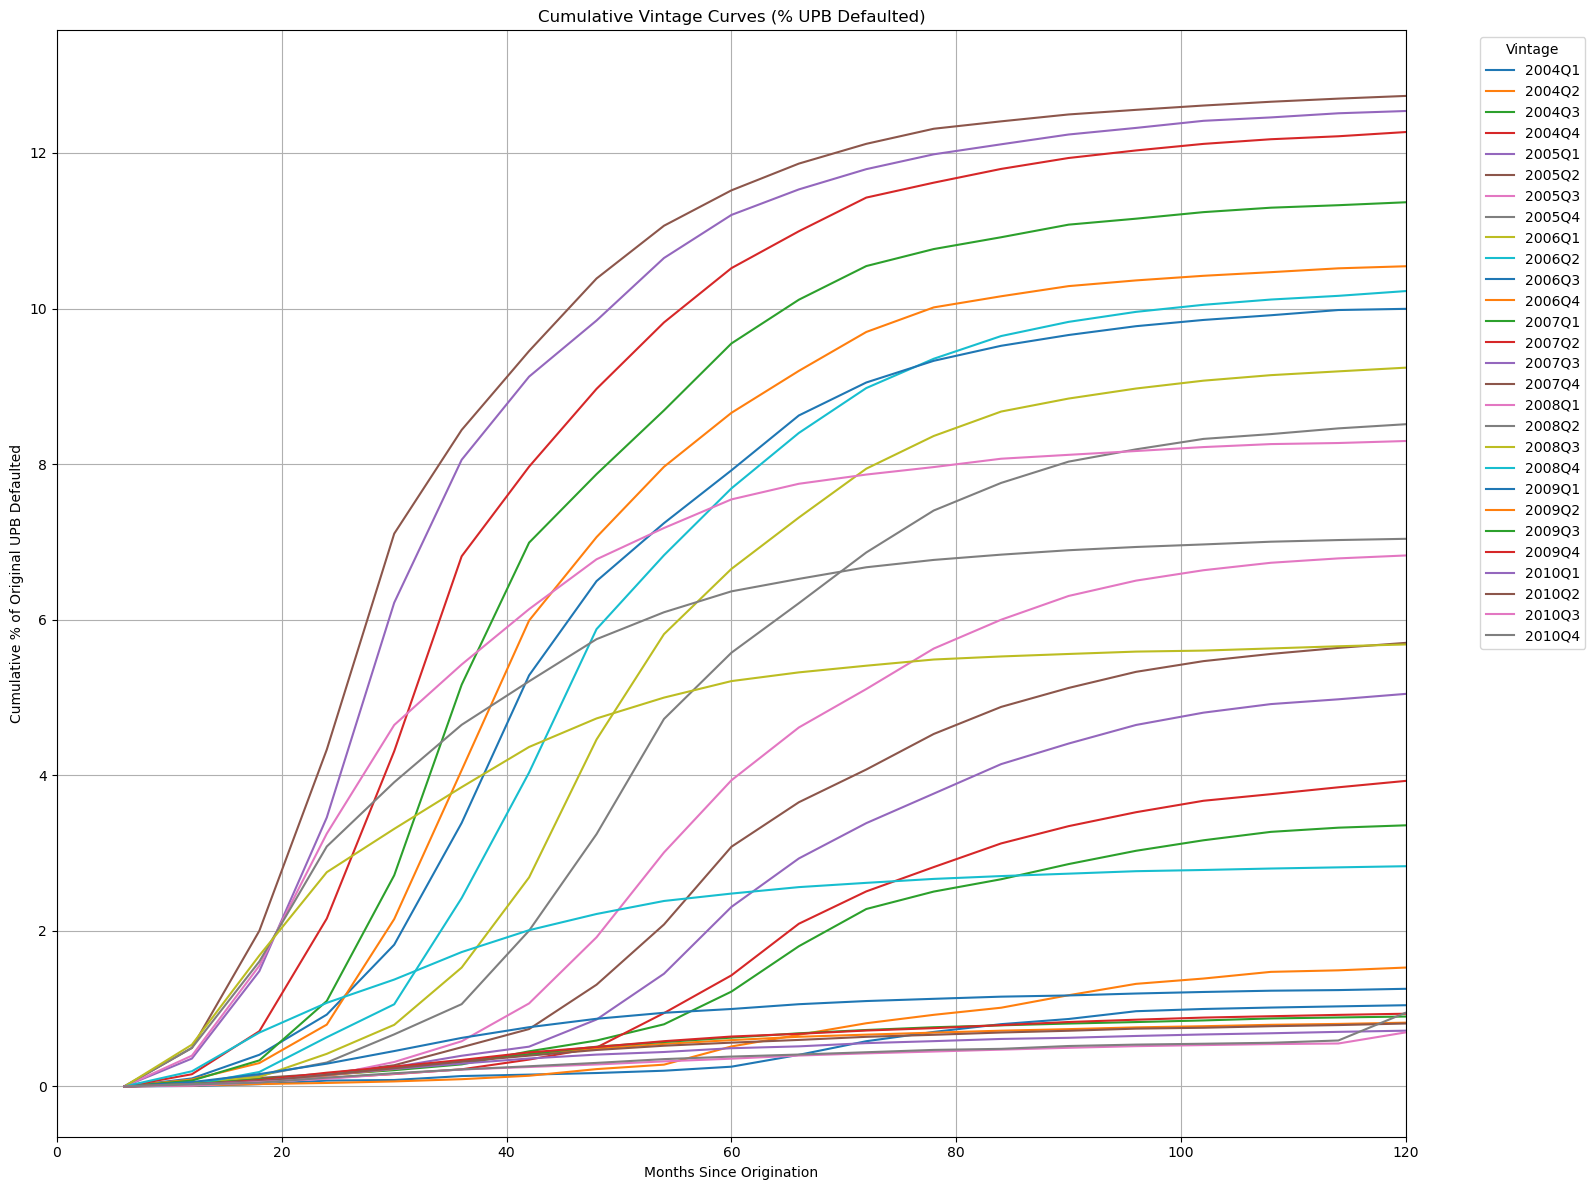

In [454]:
plt.figure(figsize=(16,12))

for vintage in upb_vintage_cum_pct.index:
    plt.plot(upb_vintage_cum_pct.columns, upb_vintage_cum_pct.loc[vintage], label=str(vintage)[:7])

plt.title('Cumulative Vintage Curves (% UPB Defaulted)')
plt.xlabel('Months Since Origination')
plt.ylabel('Cumulative % of Original UPB Defaulted')
plt.legend(title='Vintage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.xlim(0, 120)
plt.show()

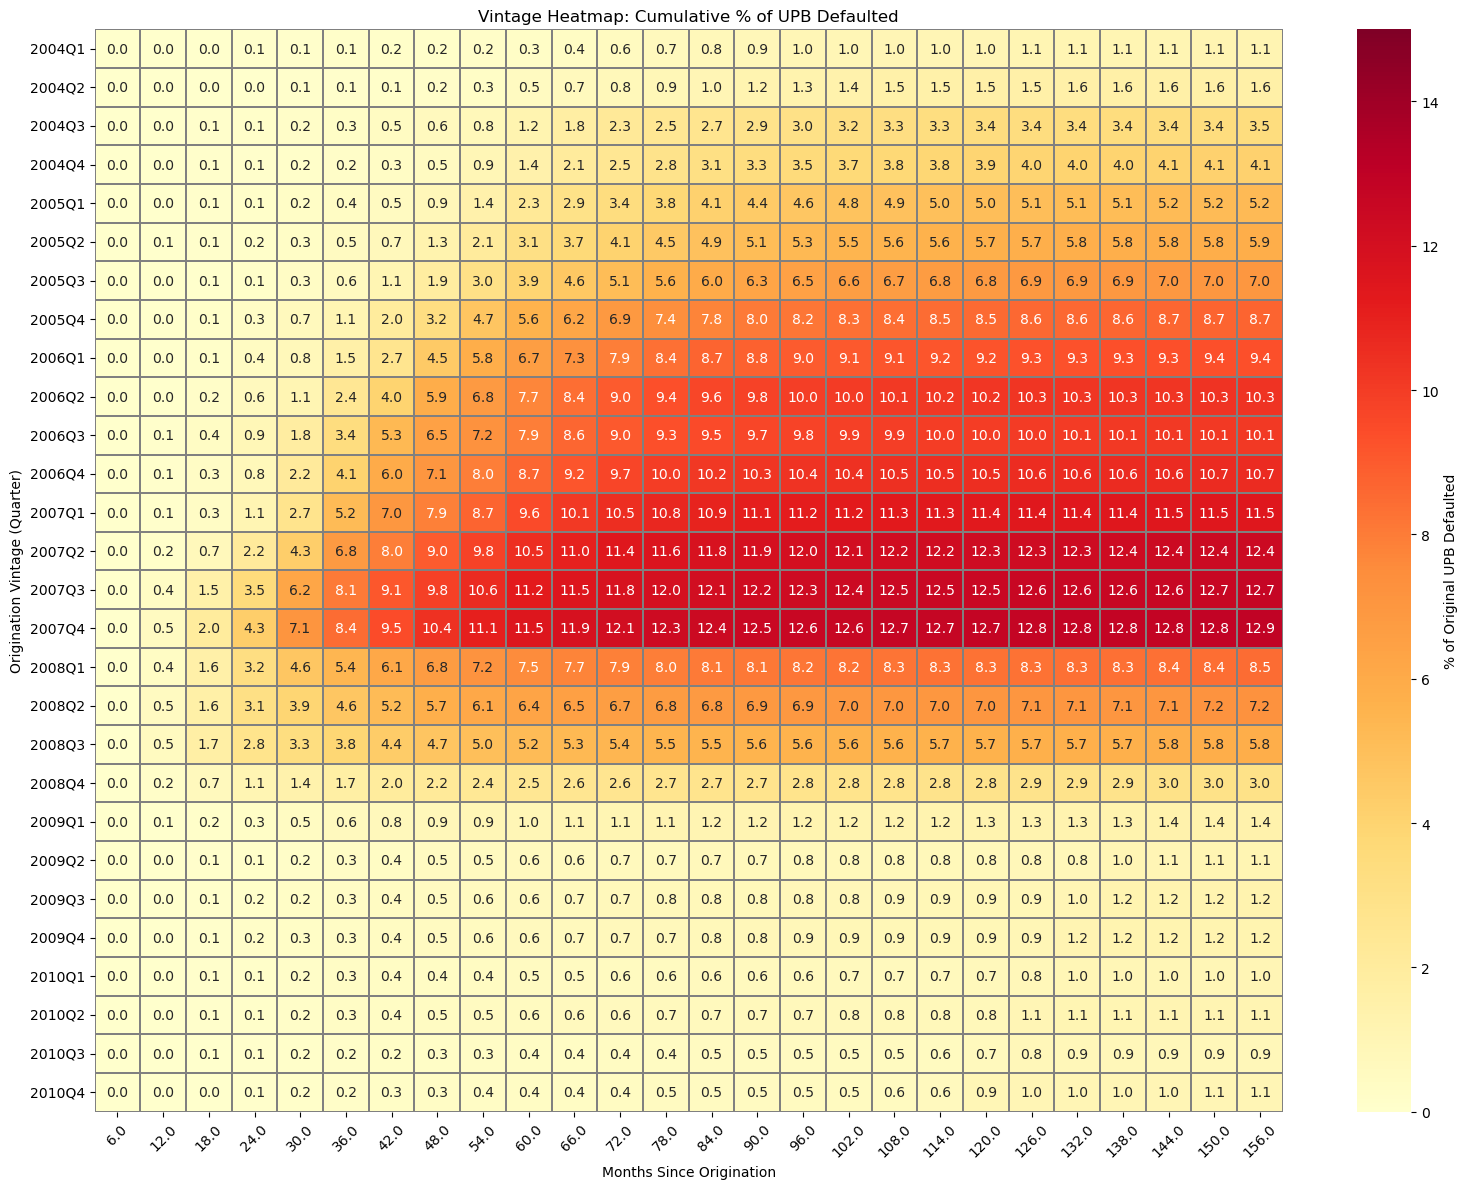

In [472]:
plt.figure(figsize=(16, 12))

sns.heatmap(
    upb_vintage_cum_pct,  # cumulative % matrix
    cmap='YlOrRd',     # yellow → orange → red
    #cmap='Purples',
    linewidths=0.1,
    linecolor='gray',
    square=False,
    cbar_kws={'label': '% of Original UPB Defaulted'},
    vmax=15,            
    annot=True, 
    fmt=".1f"
)

plt.title('Vintage Heatmap: Cumulative % of UPB Defaulted')
plt.xlabel('Months Since Origination')
plt.ylabel('Origination Vintage (Quarter)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()